<a href="https://colab.research.google.com/github/sreng-truong-da/mission_bac/blob/main/mission_Bac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mission Bac

https://docs.google.com/document/d/1MbfAKgCbhyaWVKc2RUTAnmYj2kFegr8W1H8XERZbKN4/edit?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install iteration_utilities

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.3/486.3 kB 3.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
wd = '/content/drive/MyDrive/Colab Notebooks/Mission BAC'

nom_fichier_bac = 'fr-en-baccalaureat-par-academie.csv'
nom_fichier_bac_PCS = 'fr-en-reussite-au-baccalaureat-origine-sociale.csv'
nom_fichier_musees = 'liste-et-localisation-des-musees-de-france.csv'

df_bac_pcs = pd.read_csv(wd + '/' + nom_fichier_bac_PCS, delimiter=';')
df_bac = pd.read_csv(wd + '/' + nom_fichier_bac, delimiter=';')
df_musees = pd.read_csv(wd + '/' + nom_fichier_musees, delimiter=';')

In [ ]:
# Passer les noms en majuscules, en retirant les accents, - etc.
#
def normaliser_noms(df_col):
  dc_remplacement = {'-':' ', "'":" ", "/":" ", 'Ô':'O', 'È':'E', 'É':'E', 'Ë':'E', 'Â':'A'}
  df_col = df_col.str.upper()
  df_col.replace(dc_remplacement, regex=True, inplace=True)
  return df_col

In [ ]:
display(df_bac_pcs)

## PCS et réussite au bac
Pour 1 année précise, réussite au bac par PCS

In [ ]:
display(df_bac_pcs.shape)
display(df_bac_pcs.dtypes)

(312, 10)

annee                                                  int64
origine_sociale                                       object
nombre_d_admis_au_baccalaureat_general                 int64
pourcentage_d_admis_au_baccalaureat_general          float64
nombre_d_admis_au_baccalaureat_technologique           int64
pourcentage_d_admis_au_baccalaureat_technologique    float64
nombre_d_admis_au_baccalaureat_professionnel           int64
pourcentage_d_admis_au_baccalaureat_professionnel    float64
nombre_d_admis_au_baccalaureat                         int64
pourcentage_d_admis_au_baccalaureat                  float64
dtype: object

In [ ]:
# Exploration
# nombre_d_admis_au_baccalaureat = nombre_d_admis_au_baccalaureat_general + nombre_d_admis_au_baccalaureat_technologique + nombre_d_admis_au_baccalaureat_professionnel
# Ok c'est démontré en dessous.
#
# Rassembler tous les bacs
nb_admis_bac = \
  df_bac_pcs['nombre_d_admis_au_baccalaureat_general'] + \
  df_bac_pcs['nombre_d_admis_au_baccalaureat_technologique'] + \
  df_bac_pcs['nombre_d_admis_au_baccalaureat_professionnel']

nb_temp = df_bac_pcs['nombre_d_admis_au_baccalaureat']

diff = nb_temp - nb_admis_bac
display(diff)
display(diff.unique())


0      0
1      0
2      0
3      0
4      0
      ..
307    0
308    0
309    0
310    0
311    0
Length: 312, dtype: int64

array([0])

In [ ]:
# >>> df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})
# df_bac_pcs_mean = df_bac_pcs.groupby('annee')[].sum()
# display(df_bac_pcs_mean)
traitements = {\
               'nombre_d_admis_au_baccalaureat_general': 'sum', \
               'nombre_d_admis_au_baccalaureat_technologique': 'sum', \
               'nombre_d_admis_au_baccalaureat_professionnel': 'sum', \
               'nombre_d_admis_au_baccalaureat': 'sum'\
               }

dtemp = df_bac_pcs.groupby('annee').agg(traitements).reset_index()
# dtemp = df_bac_pcs.groupby('annee')['nombre_d_admis_au_baccalaureat'].sum().reset_index()
display(dtemp)

# TODO:
# superposition des courbes
# pourcentage un bac par rapport au total ?


,annee,nombre_d_admis_au_baccalaureat_general,nombre_d_admis_au_baccalaureat_technologique,nombre_d_admis_au_baccalaureat_professionnel,nombre_d_admis_au_baccalaureat
0,1997,562018,275920,154390,992328
1,1998,574579,293495,164164,1032238
2,1999,555775,302275,177660,1035710
3,2000,565175,309571,186368,1061114
4,2001,539130,299609,186074,1024813
5,2002,536901,287385,188240,1012526
6,2003,557272,289101,184290,1030663
7,2004,541733,290112,188956,1020801
8,2005,564657,285074,187664,1037395
9,2006,585656,284832,202058,1072546


### Impact du COVID / confinement
- On voit une augmentation de la réussite au bac (taux de réussite) durant les années COVID (2020, 2021) par rapport aux années précédentes.
- Baisse en 2022, pour retrouver le niveau de 2019, 2018 donc avant le COVID
<br><br>
TODO:
- regarder les différents types de bac, si c'est la même chose

In [ ]:
list_pcs = df_bac_pcs['origine_sociale'].unique()
display(list_pcs)

array(['Retraités', 'Ouvriers',
       'Autres personnes sans activité professionnelle',
       'Professions intermédiaires', 'Ensemble',
       'Professions intermédiaires : instituteurs et assimilés',
       'Cadres, professions intellectuelles supérieures', 'Indéterminé',
       'Agriculteurs exploitants',
       "Artisans, commerçants, chefs d'entreprise",
       'Cadres, professions intellectuelles supérieures : professeurs et assimilés',
       'Employés'], dtype=object)

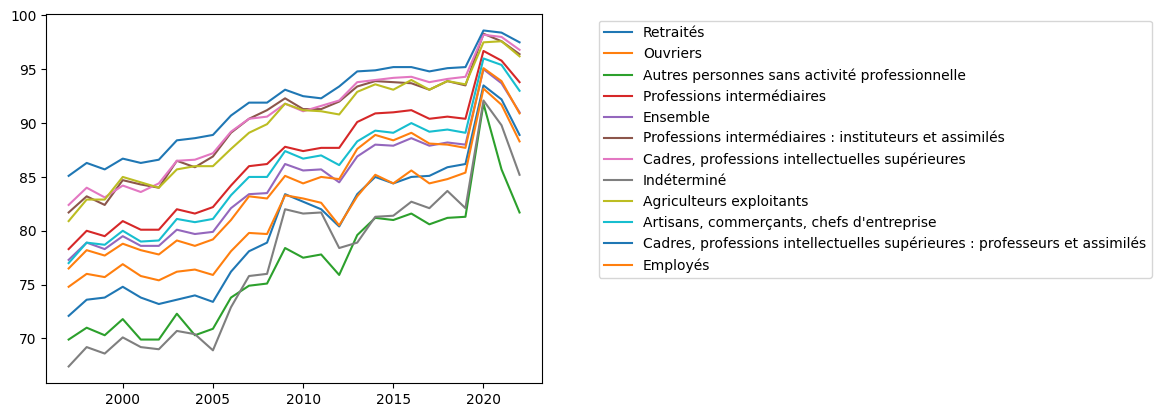

In [ ]:
# Taux de réussite au bac en fonction du PCS
#
# TODO: améliorer la lisiblité des couleurs
#
for pcs in list_pcs:
  where = df_bac_pcs['origine_sociale'] == pcs
  df = df_bac_pcs[where][['annee','pourcentage_d_admis_au_baccalaureat']].sort_values('annee').reset_index()
  plt.plot(df['annee'], df['pourcentage_d_admis_au_baccalaureat'], '-')

plt.legend(list_pcs, bbox_to_anchor=(1.1, 1))

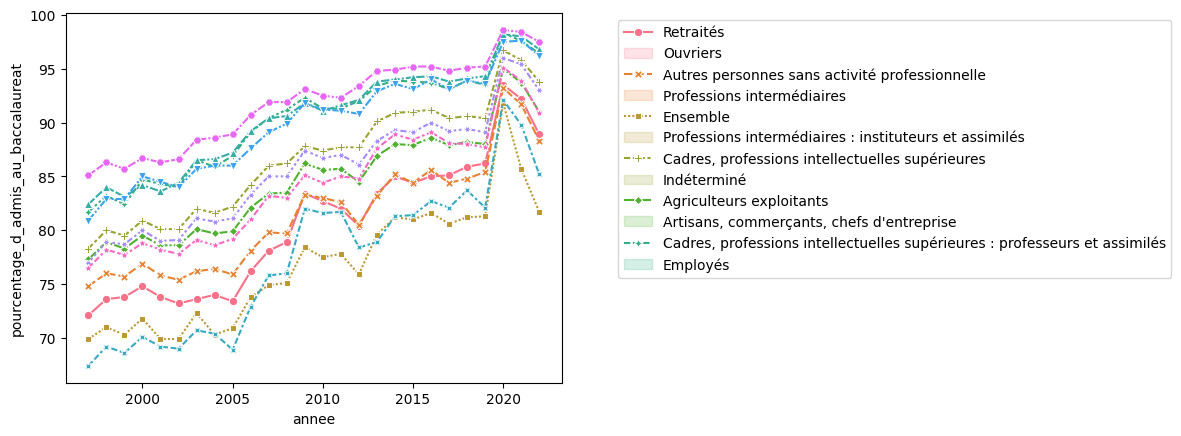

In [ ]:
sns.lineplot(data=df_bac_pcs, x='annee', y='pourcentage_d_admis_au_baccalaureat', hue='origine_sociale', style='origine_sociale', markers=True)
plt.legend(list_pcs, bbox_to_anchor=(1.1, 1))

In [ ]:
# Trier PCS en fonction taux de réussite au bac
# par année
# J'évite les années COVID
df_bac_pcs_perf = {}
list_annees = [2018, 2019, 2022]
for annee in list_annees:
  where = df_bac_pcs['annee'] == annee
  df_bac_pcs_perf[annee] = df_bac_pcs[where].sort_values('pourcentage_d_admis_au_baccalaureat',ascending=False)

for annee in list_annees:
  display(df_bac_pcs_perf[annee][['annee', 'origine_sociale', 'nombre_d_admis_au_baccalaureat','pourcentage_d_admis_au_baccalaureat']])

# TODO: Il faut comparer au nombre de personnes de la PCS dans la population générale


,annee,origine_sociale,nombre_d_admis_au_baccalaureat,pourcentage_d_admis_au_baccalaureat
240,2018,"Cadres, professions intellectuelles supérieure...",22578,95.1
239,2018,"Cadres, professions intellectuelles supérieures",156105,94.1
63,2018,Agriculteurs exploitants,9862,93.9
117,2018,Professions intermédiaires : instituteurs et a...,6435,93.9
64,2018,Professions intermédiaires,89092,90.6
298,2018,"Artisans, commerçants, chefs d'entreprise",62303,89.4
118,2018,Ensemble,677287,88.2
65,2018,Employés,118890,88.0
299,2018,Retraités,10891,85.9
179,2018,Ouvriers,107427,84.8


,annee,origine_sociale,nombre_d_admis_au_baccalaureat,pourcentage_d_admis_au_baccalaureat
181,2019,"Cadres, professions intellectuelles supérieure...",21747,95.2
301,2019,"Cadres, professions intellectuelles supérieures",152105,94.3
180,2019,Agriculteurs exploitants,8476,93.6
303,2019,Professions intermédiaires : instituteurs et a...,7560,93.5
302,2019,Professions intermédiaires,89921,90.4
67,2019,"Artisans, commerçants, chefs d'entreprise",59283,89.1
183,2019,Ensemble,668343,88.0
182,2019,Employés,123767,87.7
185,2019,Retraités,11574,86.2
68,2019,Ouvriers,98031,85.4


,annee,origine_sociale,nombre_d_admis_au_baccalaureat,pourcentage_d_admis_au_baccalaureat
71,2022,"Cadres, professions intellectuelles supérieure...",22643,97.5
123,2022,"Cadres, professions intellectuelles supérieures",154229,96.8
125,2022,Professions intermédiaires : instituteurs et a...,9846,96.4
249,2022,Agriculteurs exploitants,7248,96.2
193,2022,Professions intermédiaires,99883,93.8
189,2022,"Artisans, commerçants, chefs d'entreprise",50927,93.0
191,2022,Ensemble,666840,91.0
190,2022,Employés,138344,90.9
126,2022,Retraités,8316,88.9
192,2022,Ouvriers,87305,88.3


In [ ]:
display(df_bac_pcs_perf[]][['annee', 'origine_sociale', 'nombre_d_admis_au_baccalaureat']])
display(df_bac_pcs_perf[2022][['annee', 'origine_sociale', 'nombre_d_admis_au_baccalaureat']])


,annee,origine_sociale,nombre_d_admis_au_baccalaureat
71,2022,"Cadres, professions intellectuelles supérieure...",22643
123,2022,"Cadres, professions intellectuelles supérieures",154229
125,2022,Professions intermédiaires : instituteurs et a...,9846
249,2022,Agriculteurs exploitants,7248
193,2022,Professions intermédiaires,99883
189,2022,"Artisans, commerçants, chefs d'entreprise",50927
191,2022,Ensemble,666840
190,2022,Employés,138344
126,2022,Retraités,8316
192,2022,Ouvriers,87305


### Réussites au bac 2018, 2019, 2022 (années COVID évitées), selon le PCS
- Sans surprise, le PCS cadres, professionnelles intellectuelles en tête, avec celle en particulier des enseignants
- Les enseignants ont une performance supérieure vu le nombre d'admis au bac [TODO: à justifier ...]
- La performance des différents PCS au bac est stable: le rang est maintenu de 1997 à 2022. Les courbes ne se croisent pas [sauf 3 courbes pour proches].

<br><br>
TODO:
Il faut comparer au nombre de personnes de la PCS dans la population générale



## Réussite au bac par lycée, par commune
Préparation des données pour d'autres analyses





In [ ]:
df_bac_lycees = pd.read_csv(wd + '/' + 'fr-en-indicateurs-de-resultat-des-lycees-denseignement-general-et-technologique.csv', delimiter=";")

<ipython-input-7-91eb45ebca10>:1: DtypeWarning: Columns (49,51,52,53,55,56,57,58,59,73,74,75,76,77,78,79,80,81,98,100,111,113,115,126,134,136) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bac_lycees = pd.read_csv(wd + '/' + 'fr-en-indicateurs-de-resultat-des-lycees-denseignement-general-et-technologique.csv', delimiter=";")


In [ ]:
# attention! on ne voit pas les 145 colonnes!!
display(df_bac_lycees.dtypes)

etablissement                                  object
annee                                           int64
ville                                          object
code_etablissement                             object
commune                                        object
                                               ...   
nombre_de_mentions_ab_g                       float64
nombre_de_mentions_tb_avec_felicitations_t    float64
nombre_de_mentions_tb_sans_felicitations_t    float64
nombre_de_mentions_b_t                        float64
nombre_de_mentions_ab_t                       float64
Length: 145, dtype: object

In [ ]:
# attention! on ne voit pas les 145 colonnes!!
df_bac_lycees.columns

Index(['etablissement', 'annee', 'ville', 'code_etablissement', 'commune',
       'academie', 'departement', 'secteur_public_pu_prive_pr',
       'effectif_presents_serie_l', 'effectif_presents_serie_es',
       ...
       'taux_men_brut_gnle', 'va_men_gnle',
       'nombre_de_mentions_tb_avec_felicitations_g',
       'nombre_de_mentions_tb_sans_felicitations_g', 'nombre_de_mentions_b_g',
       'nombre_de_mentions_ab_g', 'nombre_de_mentions_tb_avec_felicitations_t',
       'nombre_de_mentions_tb_sans_felicitations_t', 'nombre_de_mentions_b_t',
       'nombre_de_mentions_ab_t'],
      dtype='object', length=145)

In [ ]:
colonnes = [\
    'annee',\
    'code_etablissement', \
    'etablissement',\
    'academie', \
    'departement', \
    'code_departement', \
    'ville',\
    'commune', \
    'effectif_presents_total_series',\
    'taux_brut_de_reussite_total_series'\
            ]

df_bac_lycees_r = df_bac_lycees[colonnes]

df_bac_lycees_r['nb_admis'] = (df_bac_lycees_r['taux_brut_de_reussite_total_series']*df_bac_lycees_r['effectif_presents_total_series'])/100

df_bac_lycees_r.dtypes

<ipython-input-66-12d495bdece7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bac_lycees_r['nb_admis'] = (df_bac_lycees_r['taux_brut_de_reussite_total_series']*df_bac_lycees_r['effectif_presents_total_series'])/100


annee                                   int64
code_etablissement                     object
etablissement                          object
academie                               object
departement                            object
code_departement                       object
ville                                  object
commune                                object
effectif_presents_total_series          int64
taux_brut_de_reussite_total_series    float64
nb_admis                              float64
dtype: object

In [ ]:
display(df_bac_lycees_r)

,annee,code_etablissement,etablissement,academie,departement,code_departement,ville,commune,effectif_presents_total_series,taux_brut_de_reussite_total_series,nb_admis
0,2021,0010032E,LYCEE XAVIER BICHAT (GENERAL ET TECHNO.),LYON,AIN,01,NANTUA,01269,144,98.0,141.12
1,2021,0010075B,LYCEE SAINT JOSEPH,LYON,AIN,01,MIRIBEL,01249,62,100.0,62.00
2,2021,0011119L,LYCEE ARBEZ CARME (GENERAL ET TECHNO.),LYON,AIN,01,BELLIGNAT,01031,237,97.0,229.89
3,2021,0011276G,LYCEE DU VAL DE SAONE,LYON,AIN,01,TREVOUX,01427,375,97.0,363.75
4,2021,0020032Z,LYCEE PAUL CLAUDEL,AMIENS,AISNE,02,LAON,02408,341,96.0,327.36
...,...,...,...,...,...,...,...,...,...,...,...
27803,2022,9741255W,LYCEE LA SALLE SAINT-CHARLES (GENERAL ET TECHNO.),LA REUNION,LA REUNION,974,SAINT PIERRE,97416,259,100.0,259.00
27804,2022,9741556Y,LYCEE CATHOLIQUE MAISON BLANCHE (GENERAL ET TE...,LA REUNION,LA REUNION,974,SAINT PAUL,97415,107,99.0,105.93
27805,2022,9760182U,LYCEE DE SADA (GENERAL ET TECHNO.),MAYOTTE,MAYOTTE,976,SADA,97616,447,77.0,344.19
27806,2022,9760270P,LYCEE DU NORD (GENERAL ET TECHNO.),MAYOTTE,MAYOTTE,976,ACOUA,97601,432,71.0,306.72


In [ ]:
# TODO: comment garder toutes les colonnes simplement ?
# il vaut mieux garder les numéros de communes, de département etc.

# repère les villes avec arrondissement NOM_VILLE 01 (2 chiffres), et remplace que par NOM_VILLE
# Elimine les arrondissements
df_bac_lycees_r['ville'].replace(to_replace='(^.*) \d\d', value=r"\1", regex=True, inplace=True)
# Pour le cas LYON 0 10 ??!! On repasse pour enlever LYON 0
df_bac_lycees_r['ville'].replace(to_replace='(^.*) \d', value=r"\1", regex=True, inplace=True)

df_bac_lycees_communes = df_bac_lycees_r.groupby(['annee', 'academie','departement','ville'])[['effectif_presents_total_series', 'nb_admis']].sum().reset_index()
df_bac_lycees_communes['taux_admis'] = (df_bac_lycees_communes['nb_admis']/df_bac_lycees_communes['effectif_presents_total_series'])*100

df_bac_lycees_communes['departement'] = normaliser_noms(df_bac_lycees_communes['departement'])
df_bac_lycees_communes['ville'] = normaliser_noms(df_bac_lycees_communes['ville'])


<ipython-input-85-b0e81eee36ed>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bac_lycees_r['ville'].replace(to_replace='(^.*) \d\d', value=r"\1", regex=True, inplace=True)
<ipython-input-85-b0e81eee36ed>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bac_lycees_r['ville'].replace(to_replace='(^.*) \d', value=r"\1", regex=True, inplace=True)


In [ ]:
display(df_bac_lycees_communes)

,annee,academie,departement,ville,effectif_presents_total_series,nb_admis,taux_admis
0,2012,AIX-MARSEILLE,ALPES DE HTE PROVENCE,BARCELONNETTE,53,46.11,87.000000
1,2012,AIX-MARSEILLE,ALPES DE HTE PROVENCE,DIGNE LES BAINS,386,341.29,88.417098
2,2012,AIX-MARSEILLE,ALPES DE HTE PROVENCE,MANOSQUE,422,394.90,93.578199
3,2012,AIX-MARSEILLE,ALPES DE HTE PROVENCE,SISTERON,179,159.31,89.000000
4,2012,AIX-MARSEILLE,BOUCHES DU RHONE,AIX EN PROVENCE,1932,1767.21,91.470497
...,...,...,...,...,...,...,...
13069,2023,VERSAILLES,YVELINES,TRAPPES,189,158.76,84.000000
13070,2023,VERSAILLES,YVELINES,VERNEUIL SUR SEINE,340,340.00,100.000000
13071,2023,VERSAILLES,YVELINES,VERSAILLES,2281,2229.42,97.738711
13072,2023,VERSAILLES,YVELINES,VILLEPREUX,230,225.40,98.000000


## réussite vs. nb musées

### Nombre de musées

In [ ]:
#df_musees = pd.read_csv(wd + '/' + nom_fichier_musees, delimiter=';')
df_musees.dtypes

region_administrative                   object
departement                             object
identifiant_museofile                   object
commune                                 object
nom_officiel_du_musee                   object
adresse                                 object
lieu                                    object
code_postal                            float64
telephone                               object
url                                     object
latitude                               float64
longitude                              float64
ref_deps                                object
geolocalisation                         object
date_arrete_attribution_appellation     object
dtype: object

In [ ]:
df_nb_musees_communes = df_musees.groupby(['departement','commune'])['nom_officiel_du_musee'].count().reset_index()
df_nb_musees_communes['departement'] = normaliser_noms(df_nb_musees_communes['departement'])
df_nb_musees_communes['commune'] = normaliser_noms(df_nb_musees_communes['commune'])

df_nb_musees_communes.rename(columns={'nom_officiel_du_musee':'nb_musees', 'commune':'ville'}, inplace=True)

display(df_nb_musees_communes['nb_musees'].unique())
display(df_nb_musees_communes)

# attention! on peut avoir plusieurs noms de commune identiques dans des départements différents!

array([ 2,  1,  3, 13,  7, 10,  8,  4, 12,  5,  6, 49])

,departement,ville,nb_musees
0,AIN,BOURG EN BRESSE,2
1,AIN,BRIORD,1
2,AIN,IZERNORE,1
3,AIN,LOCHIEU,1
4,AIN,NANTUA,1
...,...,...,...
848,YVELINES,POISSY,2
849,YVELINES,RAMBOUILLET,1
850,YVELINES,SAINT GERMAIN EN LAYE,3
851,YVELINES,SAINT REMY LES CHEVREUSE,1


In [ ]:
df_nb_musees_communes['departement'].unique()

array(['AIN', 'AISNE', 'ALLIER', 'ALPES MARITIMES',
       'ALPES DE HAUTE PROVENCE', 'ARDENNES', 'ARDECHE', 'ARIEGE', 'AUBE',
       'AUDE', 'AVEYRON', 'BAS RHIN', 'BOUCHES DU RHONE', 'CALVADOS',
       'CANTAL', 'CHARENTE', 'CHARENTE MARITIME', 'CHER', 'CORREZE',
       'CORSE DU SUD', 'CREUSE', 'COTE D OR', 'COTES D ARMOR',
       'DEUX SEVRES', 'DORDOGNE', 'DOUBS', 'DROME', 'ESSONNE', 'EURE',
       'EURE ET LOIR', 'FINISTERE', 'GARD', 'GERS', 'GIRONDE',
       'GUADELOUPE', 'GUYANE', 'HAUT RHIN', 'HAUTE CORSE',
       'HAUTE GARONNE', 'HAUTE LOIRE', 'HAUTE MARNE', 'HAUTE SAVOIE',
       'HAUTE SAONE', 'HAUTE VIENNE', 'HAUTES ALPES', 'HAUTES PYRENEES',
       'HAUTS DE SEINE', 'HERAULT', 'ILLE ET VILAINE', 'INDRE',
       'INDRE ET LOIRE', 'ISERE', 'JURA', 'LA REUNION', 'LANDES',
       'LOIR ET CHER', 'LOIRE', 'LOIRE ATLANTIQUE', 'LOIRET', 'LOT',
       'LOT ET GARONNE', 'LOZERE', 'MAINE ET LOIRE', 'MANCHE', 'MARNE',
       'MARTINIQUE', 'MAYENNE', 'MAYOTTE', 'MEURTHE ET MOSELLE',

In [ ]:
#jointure département/commune nb musées et réussite au bac

# df_bac_lycees_communes (quelle année ?, moyenne sur toutes les années ?
df_bac_lycees_communes_2022 = df_bac_lycees_communes[df_bac_lycees_communes['annee'] == 2022].reset_index()

# display(type(df_nb_musees_communes))
# display(type(df_bac_lycees_communes_2022))
# display(df_nb_musees_communes.shape)
# display(df_bac_lycees_communes_2022.shape)
# display(df_nb_musees_communes.dtypes)
# display(df_bac_lycees_communes_2022.dtypes)

df_bac_musees = pd.merge(df_nb_musees_communes, df_bac_lycees_communes_2022, left_on=['departement','ville'], right_on=['departement','ville'], how='right')

# gérer les na = 0 pour le nb musees
df_bac_musees.fillna(value={'nb_musees':0}, inplace=True)
display(df_bac_musees)

,departement,ville,nb_musees,index,annee,academie,effectif_presents_total_series,nb_admis,taux_admis
0,ALPES DE HTE PROVENCE,BARCELONNETTE,0.0,10872,2022,AIX-MARSEILLE,48,48.00,100.000000
1,ALPES DE HTE PROVENCE,DIGNE LES BAINS,0.0,10873,2022,AIX-MARSEILLE,455,431.48,94.830769
2,ALPES DE HTE PROVENCE,MANOSQUE,0.0,10874,2022,AIX-MARSEILLE,488,465.95,95.481557
3,ALPES DE HTE PROVENCE,SISTERON,0.0,10875,2022,AIX-MARSEILLE,128,122.88,96.000000
4,BOUCHES DU RHONE,AIX EN PROVENCE,8.0,10876,2022,AIX-MARSEILLE,2751,2669.68,97.043984
...,...,...,...,...,...,...,...,...,...
1093,YVELINES,TRAPPES,0.0,11965,2022,VERSAILLES,194,157.14,81.000000
1094,YVELINES,VERNEUIL SUR SEINE,0.0,11966,2022,VERSAILLES,334,330.66,99.000000
1095,YVELINES,VERSAILLES,2.0,11967,2022,VERSAILLES,2269,2227.53,98.172323
1096,YVELINES,VILLEPREUX,0.0,11968,2022,VERSAILLES,216,211.68,98.000000


In [ ]:
display(df_bac_lycees_communes_2022)

# nb d'éléments uniques
print(df_bac_lycees_communes_2022['ville'].nunique())

# taille du tableau
print(df_bac_lycees_communes_2022.shape)

# nb d'éléments uniques et taille du tableau sont différents.
# Quelles sont villes en double ? Dans des départements différents ?
from iteration_utilities import duplicates
dup = list(duplicates(df_bac_lycees_communes_2022['ville']))
print(dup)

# Oui, ces 5 villes existent dans 2 départements!

,index,annee,academie,departement,ville,effectif_presents_total_series,nb_admis,taux_admis
0,10872,2022,AIX-MARSEILLE,ALPES DE HTE PROVENCE,BARCELONNETTE,48,48.00,100.000000
1,10873,2022,AIX-MARSEILLE,ALPES DE HTE PROVENCE,DIGNE LES BAINS,455,431.48,94.830769
2,10874,2022,AIX-MARSEILLE,ALPES DE HTE PROVENCE,MANOSQUE,488,465.95,95.481557
3,10875,2022,AIX-MARSEILLE,ALPES DE HTE PROVENCE,SISTERON,128,122.88,96.000000
4,10876,2022,AIX-MARSEILLE,BOUCHES DU RHONE,AIX EN PROVENCE,2751,2669.68,97.043984
...,...,...,...,...,...,...,...,...
1093,11965,2022,VERSAILLES,YVELINES,TRAPPES,194,157.14,81.000000
1094,11966,2022,VERSAILLES,YVELINES,VERNEUIL SUR SEINE,334,330.66,99.000000
1095,11967,2022,VERSAILLES,YVELINES,VERSAILLES,2269,2227.53,98.172323
1096,11968,2022,VERSAILLES,YVELINES,VILLEPREUX,216,211.68,98.000000


1093
(1098, 8)
['SAINT DENIS', 'MONTREUIL', 'SAINT PIERRE', 'STE MARIE', 'SAINT LOUIS']


Text(0.5, 1.0, 'Réussite au baccalauréat et nombre de musées, par commune, en 2022')

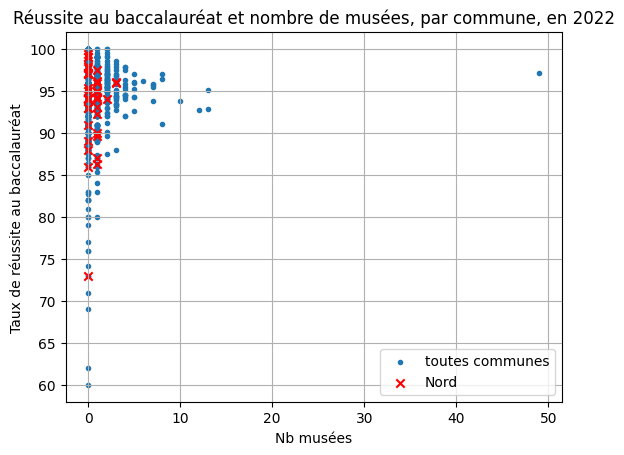

In [ ]:
plt.scatter(df_bac_musees['nb_musees'], df_bac_musees['taux_admis'], marker='.')

where = df_bac_musees['departement'] == 'NORD'
plt.scatter(df_bac_musees[where]['nb_musees'], df_bac_musees[where]['taux_admis'], marker='x', color='red')

plt.xlabel('Nb musées')
plt.ylabel('Taux de réussite au baccalauréat')
plt.grid()
plt.legend(['toutes communes', 'Nord'])
plt.title('Réussite au baccalauréat et nombre de musées, par commune, en 2022')


## réussite vs. équipements culturels

In [ ]:
df_eq_culturels = pd.read_csv(wd + '/' + 'base-des-lieux-et-des-equipements-culturels.csv', delimiter=";")

<ipython-input-41-1495c526975e>:1: DtypeWarning: Columns (14,21,22,28,29,32,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_eq_culturels = pd.read_csv(wd + '/' + 'base-des-lieux-et-des-equipements-culturels.csv', delimiter=";")


In [ ]:
display(df_eq_culturels.dtypes)
display(df_eq_culturels)

Source                                      object
Nom                                         object
Adresse                                     object
Complement Adresse                          object
Code Postal                                float64
libelle_geographique                        object
code_insee                                  object
Code Insee Arrondt                          object
Identifiant origine                         object
Type équipement ou lieu                     object
Label et appellation                        object
Région                                      object
Domaine                                     object
Sous-domaine                                object
Archéologie détail                          object
Adresse postale                             object
Département                                 object
Précision équipement                        object
N_Département                               object
Fonction_1                     

,Source,Nom,Adresse,Complement Adresse,Code Postal,libelle_geographique,code_insee,Code Insee Arrondt,Identifiant origine,Type équipement ou lieu,...,GCD,AAV,Numéro de région,Annee_Label_Appellation,Latitude,Longitude,Demographie_entree_sortie,Multi_equipements,identifi_QPV,coordonnees_geo
0,Ministère de la Culture - Direction générale d...,Musée des Tumulus de Bougon,"Lieu Dit ""la Chapelle""",NaN,79800.0,Bougon,79042,79042,7904901,Musée,...,6 - Rural à habitat dispersé,30 - Hors attraction des villes,75.0,NaN,46.374571,-0.067452,historiquement dans la base en 2020,Lieu archéologique,NaN,"46.3745713729031, -0.0674516042867952"
1,Ministère de la Culture - Direction générale d...,Muséum D'histoire Naturelle,NaN,NaN,80000.0,Amiens,80021,80021,8002102,Musée,...,1 - Grands centres urbains,13 - Pôles de 200 000 à moins de 700 000 hab.,32.0,NaN,49.890494,2.295546,historiquement dans la base en 2020,NaN,NaN,"49.8904940386365, 2.29554617216385"
2,Ministère de la Culture - Direction générale d...,Musée Départemental de L'abbaye de Saint-Riquier,B.P. 40003 Saint-Riquier,NaN,80135.0,Abbeville,80716,80716,8100401,Musée,...,5 - Bourgs ruraux,22 - Couronnes de 50 000 à moins de 200 000 hab.,32.0,NaN,50.13378,1.947086,historiquement dans la base en 2020,NaN,NaN,"50.1337796719186, 1.94708600933461"
3,Ministère de la Culture - Direction générale d...,Musée Eugénie Et Maurice Guérin,Château De Cayla,NaN,81140.0,Andillac,81012,81012,8109101,Musée,...,7 - Rural à habitat très dispersé,21 - Couronnes de moins de 50 000 hab.,76.0,NaN,44.010433,1.899362,historiquement dans la base en 2020,NaN,NaN,"44.0104328242963, 1.89936222442476"
4,Ministère de la Culture - Direction générale d...,Musée des Beaux-Arts,Avenue Dom-Vayssette,NaN,81600.0,Gaillac,81099,81099,8111501,Musée,...,2 - Centres urbains intermédiaires,11 - Pôles de moins de 50 000 hab.,76.0,NaN,43.894939,1.898122,historiquement dans la base en 2020,NaN,NaN,"43.8949389555361, 1.89812186786837"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73783,Ministère de la Culture - Direction générale d...,Musée Henri Chapu,"937, rue Chapu",NaN,77350.0,Le Mée-sur-Seine,77285,77285,7728802,Musée,...,1 - Grands centres urbains,14 - Pôles de 700 000 hab. ou plus,11.0,NaN,48.534859,2.635235,historiquement dans la base en 2020,NaN,NaN,"48.5348591757154, 2.63523527861321"
73784,Ministère de la Culture - Direction générale d...,Musée de Provins Et du Provinois,"7, rue Du Palais",NaN,77160.0,Provins,77379,77379,7740501,Musée,...,2 - Centres urbains intermédiaires,24 - Couronnes de 700 000 hab. ou plus,11.0,NaN,48.561645,3.290442,historiquement dans la base en 2020,Lieu archéologique,NaN,"48.5616445224213, 3.29044173236666"
73785,Ministère de la Culture - Direction générale d...,Ecomusée,Ferme De Coulevrain\nplace Georges Henri Rivière,NaN,77176.0,Savigny-le-Temple,77445,77445,7753301,Musée,...,2 - Centres urbains intermédiaires,24 - Couronnes de 700 000 hab. ou plus,11.0,NaN,48.574568,2.582838,historiquement dans la base en 2020,NaN,NaN,"48.574568, 2.582838"
73786,Ministère de la Culture - Direction générale d...,Musée-Maison Maurice Ravel,"5, rue Maurice Ravel",NaN,78490.0,Montfort-l'Amaury,78420,78420,7820801,Musée,...,5 - Bourgs ruraux,24 - Couronnes de 700 000 hab. ou plus,11.0,NaN,48.776128,1.805474,historiquement dans la base en 2020,Maison des illustres ; Monument historique,NaN,"48.7761276694694, 1.80547380161886"


In [ ]:
colonnes = [\
            'Nom', \
            'libelle_geographique',\
            'code_insee',\
            'Code Insee Arrondt',\
            'Type équipement ou lieu',\
            'Département',\
            'N_Département'
            ]

df_eq_culturels_r = df_eq_culturels[colonnes]

In [ ]:
display(df_eq_culturels_r)

,Nom,libelle_geographique,code_insee,Code Insee Arrondt,Type équipement ou lieu,Département,N_Département
0,Musée des Tumulus de Bougon,Bougon,79042,79042,Musée,Deux-Sèvres,79
1,Muséum D'histoire Naturelle,Amiens,80021,80021,Musée,Somme,80
2,Musée Départemental de L'abbaye de Saint-Riquier,Abbeville,80716,80716,Musée,Somme,80
3,Musée Eugénie Et Maurice Guérin,Andillac,81012,81012,Musée,Tarn,81
4,Musée des Beaux-Arts,Gaillac,81099,81099,Musée,Tarn,81
...,...,...,...,...,...,...,...
73783,Musée Henri Chapu,Le Mée-sur-Seine,77285,77285,Musée,Seine-et-Marne,77
73784,Musée de Provins Et du Provinois,Provins,77379,77379,Musée,Seine-et-Marne,77
73785,Ecomusée,Savigny-le-Temple,77445,77445,Musée,Seine-et-Marne,77
73786,Musée-Maison Maurice Ravel,Montfort-l'Amaury,78420,78420,Musée,Yvelines,78


In [ ]:
df_eq_culturels_r.rename(columns={'libelle_geographique':'ville', 'Département':'departement'}, inplace=True)
df_eq_culturels_r['ville'] = normaliser_noms(df_eq_culturels_r['ville'])
df_eq_culturels_r['departement'] = normaliser_noms(df_eq_culturels_r['departement'])
display(df_eq_culturels_r)

nb_eq_communes = df_eq_culturels_r.groupby(['departement','ville'])['Type équipement ou lieu'].count().reset_index()
nb_eq_communes.rename(columns={'Type équipement ou lieu':'nb_eq_culturel'}, inplace=True)

<ipython-input-44-ce6dd4bd71c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eq_culturels_r.rename(columns={'libelle_geographique':'ville', 'Département':'departement'}, inplace=True)
<ipython-input-44-ce6dd4bd71c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eq_culturels_r['ville'] = normaliser_noms(df_eq_culturels_r['ville'])
<ipython-input-44-ce6dd4bd71c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,Nom,ville,code_insee,Code Insee Arrondt,Type équipement ou lieu,departement,N_Département
0,Musée des Tumulus de Bougon,BOUGON,79042,79042,Musée,DEUX SEVRES,79
1,Muséum D'histoire Naturelle,AMIENS,80021,80021,Musée,SOMME,80
2,Musée Départemental de L'abbaye de Saint-Riquier,ABBEVILLE,80716,80716,Musée,SOMME,80
3,Musée Eugénie Et Maurice Guérin,ANDILLAC,81012,81012,Musée,TARN,81
4,Musée des Beaux-Arts,GAILLAC,81099,81099,Musée,TARN,81
...,...,...,...,...,...,...,...
73783,Musée Henri Chapu,LE MEE SUR SEINE,77285,77285,Musée,SEINE ET MARNE,77
73784,Musée de Provins Et du Provinois,PROVINS,77379,77379,Musée,SEINE ET MARNE,77
73785,Ecomusée,SAVIGNY LE TEMPLE,77445,77445,Musée,SEINE ET MARNE,77
73786,Musée-Maison Maurice Ravel,MONTFORT L AMAURY,78420,78420,Musée,YVELINES,78


In [ ]:
display(nb_eq_communes.dtypes)
display(type(nb_eq_communes))
display(nb_eq_communes)

departement       object
ville             object
nb_eq_culturel     int64
dtype: object

pandas.core.frame.DataFrame

,departement,ville,nb_eq_culturel
0,AIN,AMBERIEU EN BUGEY,6
1,AIN,AMBERIEUX EN DOMBES,2
2,AIN,AMBRONAY,4
3,AIN,AMBUTRIX,1
4,AIN,ANDERT ET CONDON,1
...,...,...,...
22427,YVELINES,VILLEPREUX,5
22428,YVELINES,VILLIERS LE MAHIEU,2
22429,YVELINES,VILLIERS SAINT FREDERIC,1
22430,YVELINES,VIROFLAY,4


In [ ]:
df_eq_culturels_r['Type équipement ou lieu'].unique()

array(['Musée', 'Opéra', 'Centre de création artistique',
       'Centre culturel', 'Scène', 'Théâtre', 'Monument',
       'Espace protégé', 'Parc et jardin', 'Bibliothèque', 'Librairie',
       'Conservatoire', "Centre d'art", 'Cinéma',
       'Centre de création musicale',
       "Établissement d'enseignement supérieur", "Service d'archives",
       'Lieu archéologique', 'Lieu de mémoire'], dtype=object)

In [ ]:
# gérer les na = 0 pour le nb musees
df_bac_eq_culturels = pd.merge(nb_eq_communes, df_bac_lycees_communes_2022, on=['departement','ville'], how='right' )
df_bac_eq_culturels.fillna(value={'nb_eq_culturel':0}, inplace=True)

display(df_bac_eq_culturels)

,departement,ville,nb_eq_culturel,index,annee,effectif_presents_total_series,nb_admis,taux_admis
0,AIN,AMBERIEU EN BUGEY,6.0,10872,2022,487,457.78,94.000000
1,AIN,BELLEGARDE VALSERINE,0.0,10873,2022,156,140.40,90.000000
2,AIN,BELLEY,16.0,10874,2022,273,250.81,91.871795
3,AIN,BELLIGNAT,0.0,10875,2022,216,207.36,96.000000
4,AIN,BOURG EN BRESSE,52.0,10876,2022,1376,1320.06,95.934593
...,...,...,...,...,...,...,...,...
1093,YVELINES,TRAPPES,8.0,11965,2022,194,157.14,81.000000
1094,YVELINES,VERNEUIL SUR SEINE,5.0,11966,2022,334,330.66,99.000000
1095,YVELINES,VERSAILLES,141.0,11967,2022,2269,2227.53,98.172323
1096,YVELINES,VILLEPREUX,5.0,11968,2022,216,211.68,98.000000


(60.0, 100.0)

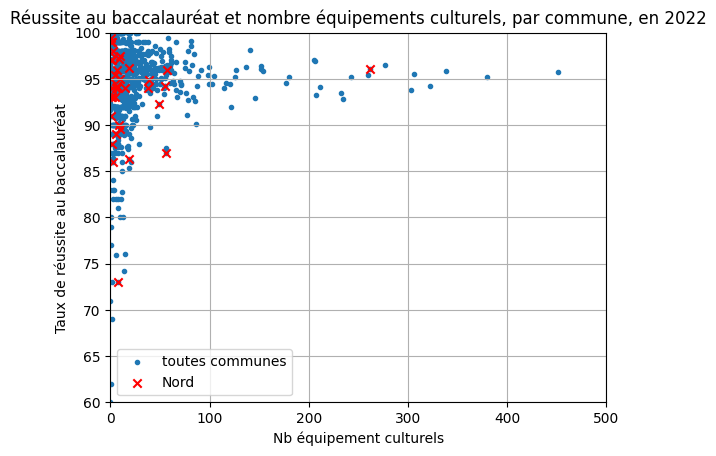

In [ ]:
plt.scatter(df_bac_eq_culturels['nb_eq_culturel'], df_bac_eq_culturels['taux_admis'], marker='.')

where = df_bac_eq_culturels['departement'] == 'NORD'
plt.scatter(df_bac_eq_culturels[where]['nb_eq_culturel'], df_bac_eq_culturels[where]['taux_admis'], marker='x', color='red')

plt.xlabel('Nb équipement culturels')
plt.ylabel('Taux de réussite au baccalauréat')
plt.grid()
plt.legend(['toutes communes', 'Nord'])
plt.title('Réussite au baccalauréat et nombre équipements culturels, par commune, en 2022')

# Zoom pour sortir Paris
plt.xlim(0, 500)
plt.ylim(60, 100)

(0.0, 7500.0)

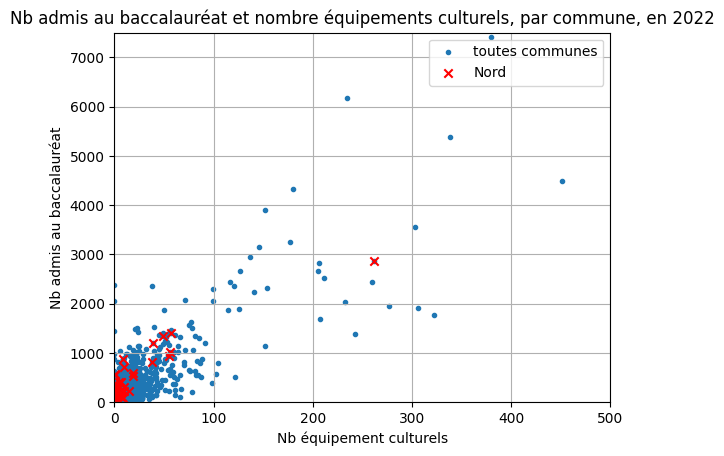

In [ ]:
plt.scatter(df_bac_eq_culturels['nb_eq_culturel'], df_bac_eq_culturels['nb_admis'], marker='.')

where = df_bac_eq_culturels['departement'] == 'NORD'
plt.scatter(df_bac_eq_culturels[where]['nb_eq_culturel'], df_bac_eq_culturels[where]['nb_admis'], marker='x', color='red')

plt.xlabel('Nb équipement culturels')
plt.ylabel('Nb admis au baccalauréat')
plt.grid()
plt.legend(['toutes communes', 'Nord'])
plt.title('Nb admis au baccalauréat et nombre équipements culturels, par commune, en 2022')

# Zoom pour sortir Paris
plt.xlim(0, 500)
plt.ylim(0, 7500)

- Pas de corrélation linéaire visible avec le taux de réussite au bac
- Corrélation visible avec le nombre d'admis
  - mais ça peut venir du fait que le nombre d'admis est sûrement corrélé au nombre d'habitants de la ville
<br><br>
TODO:
- analyse par type d'équipements
- nb équipement rapporté au nombre d'habitants

### réussite vs. nb bibliothèques

In [ ]:
where = df_eq_culturels_r['Type équipement ou lieu'] == 'Bibliothèque'
nb_bib_communes = df_eq_culturels_r[where].groupby(['departement','ville'])['Type équipement ou lieu'].count().reset_index()
nb_bib_communes.rename(columns={'Type équipement ou lieu':'nb_bib'}, inplace=True)

In [ ]:
# gérer les na = 0 pour le nb musees
df_bac_bib = pd.merge(nb_bib_communes, df_bac_lycees_communes_2022, on=['departement','ville'], how='right' )
df_bac_bib.fillna(value={'nb_bib':0}, inplace=True)

display(df_bac_bib)

,departement,ville,nb_bib,index,annee,academie,effectif_presents_total_series,nb_admis,taux_admis
0,ALPES DE HTE PROVENCE,BARCELONNETTE,0.0,10872,2022,AIX-MARSEILLE,48,48.00,100.000000
1,ALPES DE HTE PROVENCE,DIGNE LES BAINS,0.0,10873,2022,AIX-MARSEILLE,455,431.48,94.830769
2,ALPES DE HTE PROVENCE,MANOSQUE,0.0,10874,2022,AIX-MARSEILLE,488,465.95,95.481557
3,ALPES DE HTE PROVENCE,SISTERON,0.0,10875,2022,AIX-MARSEILLE,128,122.88,96.000000
4,BOUCHES DU RHONE,AIX EN PROVENCE,6.0,10876,2022,AIX-MARSEILLE,2751,2669.68,97.043984
...,...,...,...,...,...,...,...,...,...
1093,YVELINES,TRAPPES,2.0,11965,2022,VERSAILLES,194,157.14,81.000000
1094,YVELINES,VERNEUIL SUR SEINE,1.0,11966,2022,VERSAILLES,334,330.66,99.000000
1095,YVELINES,VERSAILLES,9.0,11967,2022,VERSAILLES,2269,2227.53,98.172323
1096,YVELINES,VILLEPREUX,1.0,11968,2022,VERSAILLES,216,211.68,98.000000


(60.0, 100.0)

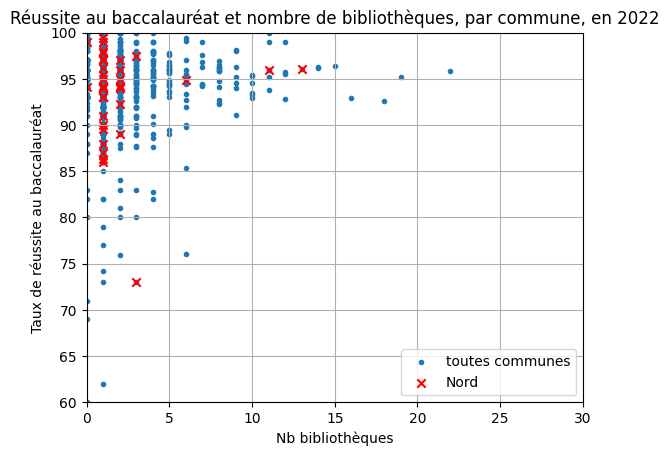

In [ ]:
plt.scatter(df_bac_bib['nb_bib'], df_bac_bib['taux_admis'], marker='.')

where = df_bac_bib['departement'] == 'NORD'
plt.scatter(df_bac_bib[where]['nb_bib'], df_bac_bib[where]['taux_admis'], marker='x', color='red')

plt.xlabel('Nb bibliothèques')
plt.ylabel('Taux de réussite au baccalauréat')
plt.grid()
plt.legend(['toutes communes', 'Nord'])
plt.title('Réussite au baccalauréat et nombre de bibliothèques, par commune, en 2022')


# Zoom pour sortir Paris
plt.xlim(0, 30)
plt.ylim(60, 100)

(0.0, 7500.0)

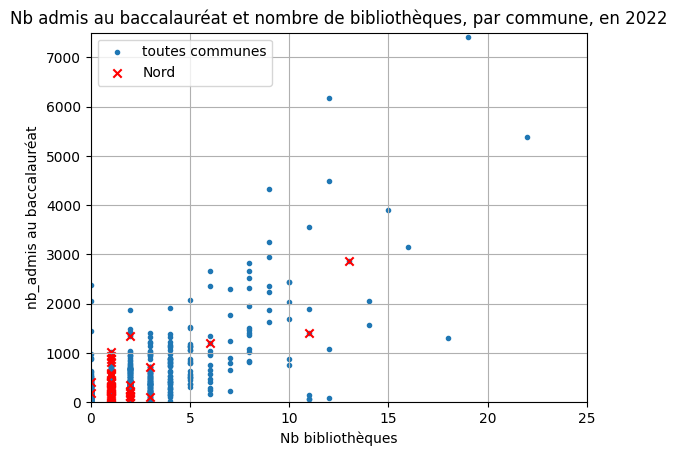

In [ ]:
plt.scatter(df_bac_bib['nb_bib'], df_bac_bib['nb_admis'], marker='.')

where = df_bac_bib['departement'] == 'NORD'
plt.scatter(df_bac_bib[where]['nb_bib'], df_bac_bib[where]['nb_admis'], marker='x', color='red')

plt.xlabel('Nb bibliothèques')
plt.ylabel('nb admis au baccalauréat')
plt.grid()
plt.legend(['toutes communes', 'Nord'], loc="upper left")
plt.title('Nb admis au baccalauréat et nombre de bibliothèques, par commune, en 2022')


# Zoom pour sortir Paris
plt.xlim(0, 25)
plt.ylim(0, 7500)

## Population municipale

In [ ]:
df_pop_com = 'POPULATION_MUNICIPALE_COMMUNES_FRANCE.xlsx'
pd.

# Check

## Réussite par académie : calcul par les lycées et par l'académie




In [ ]:
df_bac_academie = pd.read_csv(wd + '/' + 'fr-en-baccalaureat-par-academie.csv', delimiter=";")
df_bac_academie.dtypes

session                                                            int64
academie                                                          object
sexe                                                              object
statut_du_candidat                                                object
voie                                                              object
serie                                                             object
diplome_specialite                                                object
nombre_d_inscrits                                                float64
nombre_de_presents                                               float64
nombre_d_admis_au_1er_groupe                                     float64
nombre_de_refuses_au_1er_groupe                                  float64
nombre_d_ajournes_passant_les_epreuves_du_2nd_groupe             float64
nombre_d_admis_a_l_issue_du_2nd_groupe                           float64
nombre_de_refuses_a_l_issue_du_2nd_groupe          

In [ ]:
# Calcul réussite au bac par académie
# Check
# df_bac_lycees_academie = df_bac_lycees_r.groupby(['annee', 'academie'])[['nombre_de_presents','nombre_d_admis_totaux']].sum().reset_index()
df_bac_lycees_academie = df_bac_lycees_r.groupby(['annee', 'academie'])[['effectif_presents_total_series', 'nb_admis']].sum().reset_index()
df_bac_lycees_academie['taux_admis'] = (df_bac_lycees_academie['nb_admis']/df_bac_lycees_academie['effectif_presents_total_series'])*100

display(df_bac_lycees_academie)
# df_bac_lycees_academie[df_bac_lycees_academie['annee'] ==  2021]

,annee,academie,effectif_presents_total_series,nb_admis,taux_admis
0,2012,AIX-MARSEILLE,20045,17619.03,87.897381
1,2012,AMIENS,12741,10800.28,84.767915
2,2012,BESANCON,7555,6774.01,89.662608
3,2012,BORDEAUX,20528,18572.64,90.474669
4,2012,CLERMONT-FERRAND,7441,6717.30,90.274157
...,...,...,...,...,...
355,2023,REIMS,9098,8489.03,93.306551
356,2023,RENNES,25253,24646.84,97.599652
357,2023,STRASBOURG,13832,13151.03,95.076851
358,2023,TOULOUSE,21743,20992.78,96.549602


In [ ]:
df_bac_academie_r = df_bac_academie.groupby(['session','academie'])[['nombre_de_presents','nombre_d_admis_totaux']].sum().reset_index()
df_bac_academie_r['taux_admis'] = (df_bac_academie_r['nombre_d_admis_totaux'] / df_bac_academie_r['nombre_de_presents'])*100
display(df_bac_academie_r)

In [ ]:
df_bac_academie_r.dtypes

session                    int64
academie                  object
nombre_d_inscrits        float64
nombre_de_presents       float64
nombre_d_admis_totaux    float64
taux_admis               float64
dtype: object

In [ ]:
# check réussite par académie en 2021
# par 2 méthodes, on doit retrouver les mêmes résultats
annee = 2021
# attention! pour soustraire il faut aligner les index
# TODO: faire plus simple ?
calcul1 = df_bac_academie_r[df_bac_academie_r['session'] == annee]['taux_admis'].reset_index()['taux_admis']
calcul2 = df_bac_lycees_academie[df_bac_lycees_academie['annee'] ==  annee]['taux_admis'].reset_index()['taux_admis']
check_ecart =  calcul1 - calcul2

# display(check_ecart)
display(calcul1.shape)
display(calcul2.shape)
display(check_ecart.shape)
# display(type(calcul1))
display(check_ecart)
# PROBLEME = y a un ecart!!

(30,)

(30,)

(30,)

0    -3.387303
1    -3.776741
2    -2.823929
3    -2.721195
4    -3.384384
5    -2.195224
6    -4.125899
7    -3.142095
8    -2.563820
9    -4.158478
10   -6.410620
11   -4.348138
12   -3.822103
13   -2.812823
14   -2.641783
15   -4.784905
16   -4.106422
17   -2.701046
18   -3.168682
19   -2.411363
20   -2.869153
21   -2.784167
22   -3.102121
23   -3.052238
24   -2.682411
25   -3.774525
26   -2.219119
27   -3.356401
28   -2.599873
29   -3.582222
Name: taux_admis, dtype: float64

In [ ]:
display(df_bac_lycees_academie.dtypes)

annee                                   int64
academie                               object
taux_brut_de_reussite_total_series    float64
dtype: object

In [ ]:
display(df_bac_academie_r.dtypes)

session                    int64
academie                  object
nombre_d_inscrits        float64
nombre_de_presents       float64
nombre_d_admis_totaux    float64
taux_admis               float64
dtype: object